image no: 0 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellC6_Channel   BF  _Seq0014.tif
horizontal inner distance between rois: 1263.0 (microns)
vertical thickness at inner edge of left ROI : 485.0 (microns)
vertical thickness at midpoint between rois: 403.0 (microns)
vertical thickness at inner edge of right ROI : 482.0 (microns)


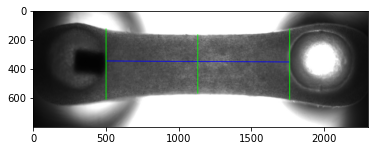


image no: 1 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellB6_Channel   BF  _Seq0013.tif
horizontal inner distance between rois: 1334.0 (microns)
vertical thickness at inner edge of left ROI : 482.0 (microns)
vertical thickness at midpoint between rois: 396.0 (microns)
vertical thickness at inner edge of right ROI : 489.0 (microns)


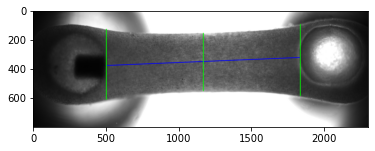


image no: 2 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellD4_Channel   BF  _Seq0011.tif
horizontal inner distance between rois: 1213.0 (microns)
vertical thickness at inner edge of left ROI : 492.0 (microns)
vertical thickness at midpoint between rois: 379.0 (microns)
vertical thickness at inner edge of right ROI : 444.0 (microns)


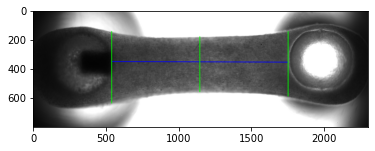


image no: 3 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellC4_Channel   BF  _Seq0010.tif
horizontal inner distance between rois: 1203.0 (microns)
vertical thickness at inner edge of left ROI : 531.0 (microns)
vertical thickness at midpoint between rois: 403.0 (microns)
vertical thickness at inner edge of right ROI : 464.0 (microns)


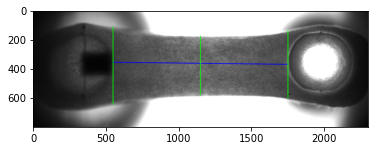


image no: 4 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellB4_Channel   BF  _Seq0009.tif
horizontal inner distance between rois: 1144.0 (microns)
vertical thickness at inner edge of left ROI : 496.0 (microns)
vertical thickness at midpoint between rois: 396.0 (microns)
vertical thickness at inner edge of right ROI : 454.0 (microns)


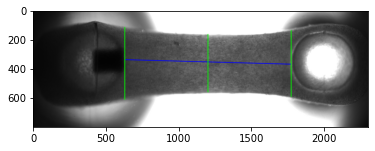


image no: 5 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellA6_Channel   BF  _Seq0012.tif
horizontal inner distance between rois: 1272.0 (microns)
vertical thickness at inner edge of left ROI : 494.0 (microns)
vertical thickness at midpoint between rois: 411.0 (microns)
vertical thickness at inner edge of right ROI : 481.0 (microns)


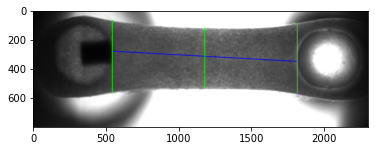


image no: 6 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellD2_Channel   BF  _Seq0006.tif
horizontal inner distance between rois: 1216.0 (microns)
vertical thickness at inner edge of left ROI : 470.0 (microns)
vertical thickness at midpoint between rois: 378.0 (microns)
vertical thickness at inner edge of right ROI : 461.0 (microns)


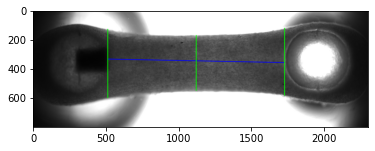


image no: 7 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellD1_Channel   BF  _Seq0007.tif
horizontal inner distance between rois: 1200.0 (microns)
vertical thickness at inner edge of left ROI : 468.0 (microns)
vertical thickness at midpoint between rois: 380.0 (microns)
vertical thickness at inner edge of right ROI : 452.0 (microns)


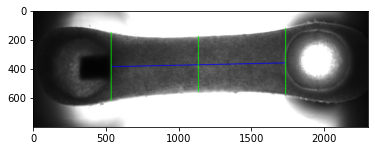


image no: 8 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellC2_Channel   BF  _Seq0005.tif
horizontal inner distance between rois: 1222.0 (microns)
vertical thickness at inner edge of left ROI : 471.0 (microns)
vertical thickness at midpoint between rois: 371.0 (microns)
vertical thickness at inner edge of right ROI : 452.0 (microns)


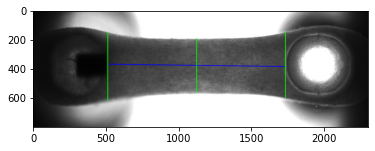


image no: 9 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellC1_Channel   BF  _Seq0004.tif
horizontal inner distance between rois: 1245.0 (microns)
vertical thickness at inner edge of left ROI : 464.0 (microns)
vertical thickness at midpoint between rois: 368.0 (microns)
vertical thickness at inner edge of right ROI : 452.0 (microns)


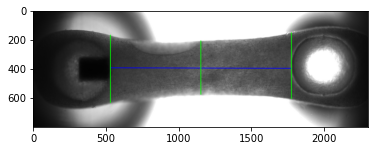


image no: 10 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellB2_Channel   BF  _Seq0002.tif
horizontal inner distance between rois: 1256.0 (microns)
vertical thickness at inner edge of left ROI : 474.0 (microns)
vertical thickness at midpoint between rois: 381.0 (microns)
vertical thickness at inner edge of right ROI : 459.0 (microns)


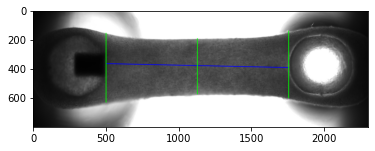


image no: 11 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellB1_Channel   BF  _Seq0003.tif
horizontal inner distance between rois: 1215.0 (microns)
vertical thickness at inner edge of left ROI : 474.0 (microns)
vertical thickness at midpoint between rois: 373.0 (microns)
vertical thickness at inner edge of right ROI : 458.0 (microns)


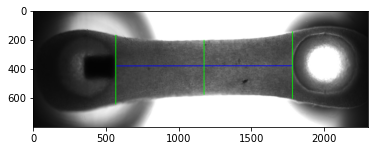


image no: 12 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellA4_Channel   BF  _Seq0008.tif
horizontal inner distance between rois: 1168.0 (microns)
vertical thickness at inner edge of left ROI : 496.0 (microns)
vertical thickness at midpoint between rois: 404.0 (microns)
vertical thickness at inner edge of right ROI : 468.0 (microns)


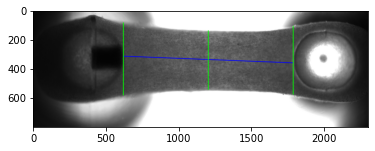


image no: 13 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellA1_Channel   BF  _Seq0000.tif
horizontal inner distance between rois: 1300.0 (microns)
vertical thickness at inner edge of left ROI : 524.0 (microns)
vertical thickness at midpoint between rois: 423.0 (microns)
vertical thickness at inner edge of right ROI : 491.0 (microns)


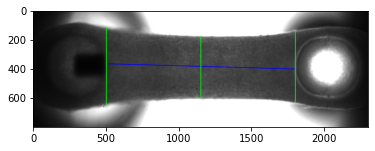


image no: 14 - /storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/suite/Plate2021-11-16_d11_CRD-001-S2_MA-Opt-run1_WellD6_Channel   BF  _Seq0015.tif
horizontal inner distance between rois: 1221.0 (microns)
vertical thickness at inner edge of left ROI : 514.0 (microns)
vertical thickness at midpoint between rois: 431.0 (microns)
vertical thickness at inner edge of right ROI : 479.0 (microns)


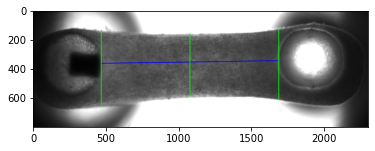

In [1]:
from morphology import computeMorphologyMetrics
from matplotlib import pyplot as plt
%matplotlib inline

# Computes morphology metrics and writes out an xlsx file with the numerical results.
# NOTE: Results will be written to a sub directory of where the file/s analyzed are located.
#
# search_image_path:            Path to the image or directory of images that metrics are to be computed for.
#                               OPTIONS:
#                               - "select_file" or "select_dir' (case is ignored),
#                                 a small window will pop up allowing selection of a file or directory 
#                                 from the file system where the image or images exist.
#
# template_image_paths:         A list of 2 paths to templates that will be located in search_image. 
#                               i.e. template_image_paths = [path_to_template_1_image, path_to_template_2_image]
#                               These templates should have inner edges that form vertical end points of
#                               a sub region in search_image that will be analyzed i.e.
#                               the left template should have it's right vertical edge as the
#                               left most point in search_image to consider, and 
#                               the right template should have it's left vertical edge as the 
#                               right most point in search_image to consider.
#                               OPTIONS: 
#                               - "select_files" (case is ignored),
#                                 a window will pop up allowing selection from the file system.
#                               - "draw_rois", for every image being analyzed,
#                                 a window will pop up where you can manually select ROIs.
#                                 To draw the ROIs, the process is as follows:
#                                 draw the bounding box for an roi and then hit enter, repeat for every roi,
#                                 when all ROIs have been drawn, hit ESC to complete the selection.
#                               - "draw_rois_once", the procedure is the same as for "draw_rois",
#                                 but only the first image will appear to select ROIs from
#                                 all other images to analyze will use these same templates.

base_directory = '/storage/data/home/positimothy/dev/repo/curibio/optical-tracking/test_data/morphology/failing/images/'
directory_with_images = base_directory  + 'suite/'
template_image_paths = [
    base_directory + 'drawn_template_images/template_image_1.tif', 
    base_directory + 'drawn_template_images/template_image_2.tif', 
]   # 'draw_rois_once'
computeMorphologyMetrics(
    search_image_path=directory_with_images,
    template_image_paths=template_image_paths,
    sub_pixel_search_increment=None,
    sub_pixel_refinement_radius=None,
    microns_per_pixel=1.0,
    write_result_images=True,
    display_result_images=True    
)